In [2]:
import calendar
c = calendar.TextCalendar()
print(c.formatmonth(2024,1))

    January 2024
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



In [13]:
import time as t
lt = [ x for x in range(40000000)]
tp = tuple([ x for x in range(40000000)])
print(type(lt))
print(type(tp))

<class 'list'>
<class 'tuple'>


In [23]:
# 측정시작
start = t.time() # 필수 1
for i in lt:
    lts = [1,2,3,4,5,6]
print(t.time() - start) # 필수 2
print('리스트 속도')

11.567400693893433
리스트 속도


In [24]:
# 측정시작
start = t.time()
for i in tp:
    tps = (1,2,3,4,5,6)
print(t.time() - start)
print('튜플 속도')

4.669835567474365
튜플 속도


In [26]:
import time as t
start = t.time()
from random import choice as rc
n1=n2=n3=n4=n5=n6=0
for n in range(1000000):
    num = rc(range(1,7))
    if num == 1:
        n1+=1
    if num == 2:
        n2+=1
    if num == 3:
        n3+=1
    if num == 4:
        n4+=1
    if num == 5:
        n5+=1
    if num == 6:
        n6+=1
print(n1,n2,n3,n4,n5,n6,f'동작시간:{t.time()-start:0.3}')

167206 166676 166588 166422 167016 166092 동작시간:1.98


- 환경변수 세팅

In [5]:
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


# RESTful (Requests)

## 웹 API (키없음)

### 환률정보

In [1]:
import requests as req
gdata = req.get('https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD').json()
data =gdata[0]
date = data['date']
time = data['time']
bprice = data['basePrice']
print(f'{date}\n{time}\n1달러에 {bprice}원')

2024-01-24
09:14:06
1달러에 1338.2원


In [2]:
inp = input('환전하고 싶은 달러를 입력하세요')
result = float(inp) * float(bprice)
print(f'지금은 환률은 1달러에 {format(bprice,",")}원 입니다. 요청하신 {inp} 달러는 {format(round(result),",")} 원 입니다.')

환전하고 싶은 달러를 입력하세요 1


지금은 환률은 1달러에 1,335.7원 입니다. 요청하신 1 달러는 1,336 원 입니다.


In [ ]:
import time as t
while 1:
    with open('krwusd.txt','a') as f:
        data = f'{date},{time},{float(bprice)}\n'
        f.write(data)
    print(f'{time} 기록 완료.')
    t.sleep(60*60) # 1시간 간격

### 비트코인 정보

In [2]:
import requests as req
gdata = req.get("https://api.bithumb.com/public/ticker/ALL_KRW").json()
btc  = gdata['data']['BTC']

maxp = float(btc['max_price']) # 최대가
minp = float(btc['min_price']) # 최소가
openp = float(btc['opening_price']) # 시작가
bandp = float(maxp) - float(minp) # 변화폭
print(openp,maxp,minp)
print(bandp)
if (openp + bandp) > maxp:
    print('상승장')
else:
    print('하락장')
# 56155000.0 56368000.0 54556000.0
# 1812000.0
# 상승장

53415000.0 55439000.0 53407000.0
2032000.0
상승장


## 공공 API (미세먼지) REST API GET방식

In [2]:
import requests as req
import time as t
import os
from dotenv import load_dotenv
load_dotenv()
url = 'http://apis.data.go.kr/6260000/AirQualityInfoService/getAirQualityInfoClassifiedByStation'
key = os.environ.get('GOV_KEY')
num = 50
params = {'serviceKey':key,'pageNo':'1','numOfRows':num,'resultType':'json'}
response = req.get(url, params).json()
# print(response.content)
data = response['getAirQualityInfoClassifiedByStation']['body']['items']['item']
inp = input('원하는 지역이름을 적어주세요') or '전포동'
start = t.time()
if inp not in [s['site'] for s in data]:
    print('해당 지역정보가 없습니다.')
else:       
    for v in data:
        if(v['site']==inp):
            print(f"=={v['controlnumber']}==\n{inp} 지역\n미세먼지:{v['pm10']}\n초미세먼지:{v['pm25']}\n{'='*14}")
print(t.time()-start)

원하는 지역이름을 적어주세요 


==2024012411==
전포동 지역
미세먼지:21
초미세먼지:10
==2024012410==
전포동 지역
미세먼지:18
초미세먼지:10
0.001539468765258789


## 카카오 API (KoGPT) REST API POST방식¶

In [3]:
# coding=utf8
# REST API 호출에 필요한 라이브러리
import requests ,os
import json
from dotenv import load_dotenv
load_dotenv()
REST_API_KEY = os.environ.get('KAKAO_API_KEY')

# KoGPT API 호출을 위한 메서드 선언
# 각 파라미터 기본값으로 설정
def kogpt_api(prompt, max_tokens = 1, temperature = 1.0, top_p = 1.0, n = 1):
    r = requests.post(
        'https://api.kakaobrain.com/v1/inference/kogpt/generation',
        json = {
            'prompt': prompt,
            'max_tokens': max_tokens,
            'temperature': temperature,
            'top_p': top_p,
            'n': n
        },
        headers = {
            'Authorization': 'KakaoAK ' + REST_API_KEY,
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

prompt='''23일 오전 9시께 충남 서천군 서천읍 서천특화시장에는 뜬눈으로 밤을 지새운 상인들이 하나둘씩 수척한 얼굴로 모여들었다.
수산 장화를 신은 채 새까맣게 변해버린 시장을 바라보던 한 상인은 검게 그을린 활어차 산소통을 보고 그만 고개를 숙였다.
시장에서 15년째 영업 중이라는 이 상인은 "불났다는 이야기를 듣고 밤새 잠도 못 자고 나와봤는데 처참한 상황을 보니 말이 안 나온다"며 목이 멘 목소리로 말했다.

전날 오후 11시 8분께 시장에서 불이 나 점포 292개 가운데 227개가 탔다. 인명피해는 없었지만, 한때 소방 대응 2단계가 발령됐을 정도로 불길은 거셌다.
9시간 동안 화마가 휩쓸고 간 시장은 검게 탄 잿더미만 가득했다.
근처에는 매캐한 냄새가 가득해 마스크를 쓰고 있지 않으면 숨쉬기가 힘들 정도였다.

불에 탄 산소통만 덩그러니
(서천=연합뉴스) 강수환 기자 = 22일 오후 11시 8분께 충남 서천군 서천읍 서천특화시장에서 불이 나 점포 227개가 탔다. 불은 인명 피해 없이 9시간 만에 완전히 진화됐다. 수산물동과 식당동, 일반동 내 점포가 모두 소실됐다. 별관인 농산물동과 먹거리동 65개 점포까지는 번지지 않았다. 사진은 불이 난 서천특화시장 모습. 2024.1.23 swan@yna.co.kr

대설특보가 내려진 가운데 검게 그을린 건물에 쌓인 흰 눈이 상인들의 마음을 더 아프게 했다.
인생의 대부분을 시장과 함께했다는 권준흘(81)씨는 초조한 표정으로 상인 대기실에 앉아 있었다.
권씨는 "불났다는 이야기를 듣고 밤새 한숨도 못 잤다"면서 "설 대목이라 건어물을 많이 들여놨는데, 다 팔지도 못하고 어떻다고 말도 못 하겠다"고 고개를 저었다.
설 대목을 앞두고 수산물 등 물건을 많이 주문해뒀던 상인들은 하루아침에 날벼락을 맞았다.
화재로 일터와 재산을 모두 잃게 된 상인들은 모여서 한숨만 내쉬었다.
이틀 전 킹크랩만 2천만원어치를 가져다 놓았다는 상인, 건어물 몇천만원 어치를 사놓았다는 상인들의 하소연이 이어졌다.
어머니 때부터 50년간 장사를 이어오고 있다는 최모(49)씨는 "설 대목 앞두고 대부분 상인이 고기나 김, 어패류 선물 세트 등 평소보다 5∼10배 이상 되는 물건들을 들여놨었다"면서 "우리도 굴을 평소보다 8배나 많이 들여놨는데 이렇게 될 거라고 누가 상상이나 했겠는가"라며 혀를 찼다.

까맣게 타버린 서천특화시장
(서천=연합뉴스) 강수환 기자 = 22일 오후 11시 8분께 충남 서천군 서천읍 서천특화시장에서 불이 나 점포 227개가 탔다. 불은 인명 피해 없이 9시간 만에 완전히 진화됐다. 수산물동과 식당동, 일반동 내 점포가 모두 소실됐다. 별관인 농산물동과 먹거리동 65개 점포까지는 번지지 않았다. 사진은 불이 난 서천특화시장 모습. 2024.1.23 swan@yna.co.kr
40년간 이곳에서 장사한 노모 뒤를 이어 수산물 가게를 운영하는 김진수(56)씨도 "불이 난 수산물동 외에도 건조장에 매연 그을음이 생기고 냄새가 배어 아무것도 못 쓰게 됐다. 그렇게 된 생선을 누가 먹겠나"라며 "건조장 아래에 있는 냉동고도 전기가 차단돼 언제 전기가 공급될지 모르는 상황에서 물건을 다 못 쓴다고 보면 된다"고 허탈해했다.
김씨는 "이 시장이 서천의 랜드마크 역할을 하고 있어서 주변 도시 등 전국에서 관광객들이 모여들고 찾아주는 곳인데, 시장이 사라졌으니 우리 상인들뿐 아니라 군 전체가 너무 힘든 상황"이라고 했다.
온 가족이 함께 장사로 업을 이어가고 있는 최씨는 "보상은 둘째치고 평생을 장사해오신 분들은 이제 살아갈 의지를 잃었다. 여기 상인들은 일 년에 딱 24일만 쉰다. 341일을 일하던 이들의 삶의 터전이 사라졌다고 보면 된다"고 안타까워했다.

초조한 마음으로 모여든 상인들
(서천=연합뉴스) 강수환 기자 = 22일 오후 11시 8분께 충남 서천군 서천읍 서천특화시장에서 불이 나 점포 227개가 탔다. 불은 인명 피해 없이 9시간 만에 완전히 진화됐다. 수산물동과 식당동, 일반동 내 점포가 모두 소실됐다. 별관인 농산물동과 먹거리동 65개 점포까지는 번지지 않았다. 사진은 피해 상황 공유를 위해 모여든 서천특화시장 상인들. 2024.1.23 swan@yna.co.kr

한동훈 비대위원장 등 정치인들이 방문한다는 소식을 들은 상인들 일부는 큰 소리를 내기도 했다.
한 상인은 "오면 뭐 할 것인가. 경호원들 딱 붙어서 제대로 확인이나 하겠나"고 쓴웃음을 지었다.
다른 상인도 "선거용으로밖에는 보이질 않는다. 얼굴만 보여주고 가려는 것 아닌가"라며 볼멘소리를 터뜨렸다.
충남도와 서천군에서는 상인들에게 행정적인 지원에 최선을 다하겠다는 방침이다.
김기웅 군수는 "설 명절을 앞두고 발생한 재난으로 막대한 피해를 본 상인들의 비통한 심정은 이루 말할 수 없다"면서 "시장 상인들의 의견을 최대한 반영해 서천특화시장의 신속한 정상화에 주력하겠다"고 밝혔다.
발화 지점이 전소돼 화재 원인 규명까지는 시간이 걸릴 것으로 예상된다.
시장 복구 기간도 최소 1년 이상 소요될 것으로 관측되는 가운데 시장 상인들의 시름은 깊어지고 있다.
한줄 요약:'''
response = kogpt_api(prompt, max_tokens=128, top_p=0.7)

print(response)

{'id': '1e815d81-fc95-4b28-9c18-51d3e006ff25', 'generations': [{'text': "  23일 새벽 서해상의 기상 악화 속에 7곳에서 동시다발적 발화된 '노량진 수산시장'에 대하여 충북도·전라도 지역소방당국 관계자는 전통재래식 방식에서 일어난 사고임을 들어 노량진역과 가깝기 때문이라고 추정했으나 이미 다른 유통경로를 통해 구입한 물량 확보 문제, 현금거래 비율 증가 등이 거론됨으로써 관계 당국 또한 초기대응 실패 책임에서 자유로울수 없으며 서둘러 장사 재개 방안 마련해야 한다", 'tokens': 98}], 'usage': {'prompt_tokens': 1305, 'generated_tokens': 98, 'total_tokens': 1403}}


## 카카오 API Karlo 이미지생성

In [47]:
# !pip install image # PIL 설치

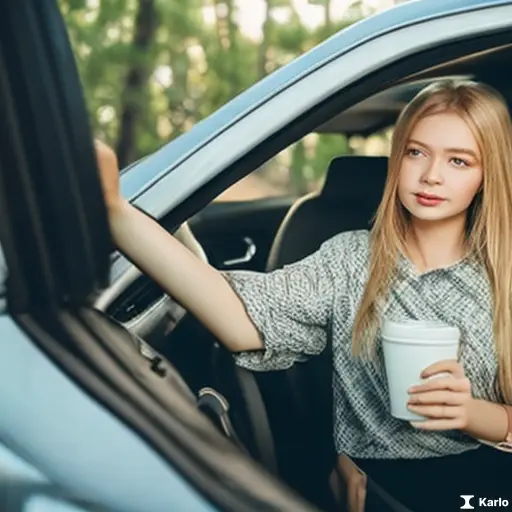

In [4]:
# REST API 호출, 이미지 파일 처리에 필요한 라이브러리
import requests , os
import json
import urllib
from PIL import Image
from dotenv import load_dotenv
load_dotenv()
REST_API_KEY = os.environ.get('KAKAO_API_KEY')

# 이미지 생성하기 요청
def t2i(prompt, negative_prompt):
    r = requests.post(
        'https://api.kakaobrain.com/v2/inference/karlo/t2i',
        json = {
            'prompt': prompt,
            'negative_prompt': negative_prompt
        },
        headers = {
            'Authorization': f'KakaoAK {REST_API_KEY}',
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

# 프롬프트에 사용할 제시어
prompt = "car with girl"
negative_prompt = "cat,dog"

# 이미지 생성하기 REST API 호출
response = t2i(prompt, negative_prompt)
# print(response['images'][0]['image'])

# 응답의 첫 번째 이미지 생성 결과 출력하기
# result = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
# result.show()

Image.open(urllib.request.urlopen(response['images'][0]['image']))

## 네이버 API 파파고 번역기

In [1]:
import os
import sys
import json
import urllib.request
# load .env
from dotenv import load_dotenv
load_dotenv()
client_id = os.environ.get('NAVER_API_ID')
client_secret = os.environ.get('NAVER_API_PW')
inp = input('영어로 번역할 한국어를 작성하세요.')
encText = urllib.parse.quote(inp)
data = "source=ko&target=en&text=" + encText
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body =response.read()
    data =  json.loads(response_body.decode('utf-8'))['message']['result']['translatedText']
    print(data)
else:
    print("Error Code:" + rescode)

영어로 번역할 한국어를 작성하세요. 키가 정상적으로 동작됩니다.


The key operates normally.


## 네이버 API 뉴스 검색

In [2]:
import os
import sys
import json
import urllib.request
# load .env
from dotenv import load_dotenv
load_dotenv()
client_id = os.environ.get('NAVER_API_ID')
client_secret = os.environ.get('NAVER_API_PW')
encText = urllib.parse.quote("속보")
url = "https://openapi.naver.com/v1/search/news.json?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    data =  json.loads(response_body.decode('utf-8'))['items']
    for v in data:
        print(v)
else:
    print("Error Code:" + rescode)

{'title': "[<b>속보</b>] '위안부는 매춘의 일종' 발언한 류석춘 전 연세대 교수 무죄", 'originallink': 'https://news.sbs.co.kr/news/endPage.do?news_id=N1007510959&plink=ORI&cooper=NAVER', 'link': 'https://n.news.naver.com/mnews/article/055/0001125258?sid=102', 'description': "'위안부는 매춘의 일종' 발언한 류석춘 전 연세대 교수 무죄", 'pubDate': 'Wed, 24 Jan 2024 10:57:00 +0900'}
{'title': '[기상<b>속보</b>]내일날씨 서울 영하10도 출근길 한파특보...오늘 호남 서부·제주 ...', 'originallink': 'http://www.issuenbiz.com/news/articleView.html?idxno=36903', 'link': 'http://www.issuenbiz.com/news/articleView.html?idxno=36903', 'description': '앞서 24일 오전 10시 기상청<b>속보</b>에 따르면 대설특보가 발효된 전라권서부와 제주도를 중심으로 시간당 1cm 내외의 눈이 오는 곳이 있다. 낮까지 전라권서부에 눈이 오는 곳이 있겠다. 전라권과 제주도를 중심으로 많은... ', 'pubDate': 'Wed, 24 Jan 2024 10:56:00 +0900'}
{'title': "[<b>속보</b>]20대 여성 숨지게 한 '압구정 롤스로이스' 운전자에 징역 20년 선고", 'originallink': 'https://www.kwnews.co.kr/page/view/2024012410355817112', 'link': 'https://n.news.naver.com/mnews/article/087/0001021756?sid=102', 'description': "<b>속보</b>=이른바 '압구정 롤스로이스' 교통사고로 

# Web Crawling

## 부산대학교 학식정보 크롤링하기

In [2]:
! pip install html5lib

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 227.8 kB/s eta 0:00:00a 0:00:01


In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
web = req.get('https://www.pusan.ac.kr/kor/CMS/MenuMgr/menuListOnBuilding.do')
soup = bs(web.content,'html5lib')
# table = soup.select('.menu-tbl')
date = soup.select('.menu-tbl .date')
day = soup.select('.menu-tbl .day')
won = soup.select('h3.menu-tit01')
menu = soup.select('h3.menu-tit01+p')
inp =input('원하는 요일을 입력하세요. 전체 요일을 원할 때는 \'모두\'를 입력하세요') or '모두'
for y,d,w,m in zip(date,day,won,menu):
    if d.text==inp or inp=='모두':
        print('-'*15)
        print(f'{y.text} ({d.text})')
        print('-'*15)    
        print(w.text)
        print(m.text)
    else:pass

In [ ]:
import haksik as h
print(h.bab())
# ins = input('원하는 요일을 입력하세요. 전체 요일을 원할 때는 \'모두\'를 입력하세요') or '모두'
# print(h.bab(ins))

In [5]:
import time as t
start = t.time()
inp = 'some'

for x in range(13000000):
    if x==inp or inp=='모두':
        pass
print(t.time() - start)
start = t.time()

for x in range(13000000):
    if inp in ['모두',x]:
        pass
print(t.time() - start)

3.675685167312622
4.641412973403931


## 네이버 주식정보 크롤링하기

In [21]:
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://finance.naver.com/sise/lastsearch2.nhn'
web = req.get(url)

# 기본
# html = web.text # 텍스트로 뽑아내기
# print(html.find('74,000')) # find 로 스트링 시작값 찾아내기
# print(html[34526:34530],html[34599:34605]) # 관련내용 출력

# soup 사용
soup = bs(web.content,'html.parser')
contents = soup.find_all(class_='tltle')
# for data, n in zip(contents, range(len(contents))):
for n , data in enumerate(contents,1):
    if n<11:print(f'{n}:{data.text}')

1:제주반도체
2:삼성전자
3:우진엔텍
4:SFA반도체
5:POSCO홀딩스
6:에코프로
7:어보브반도체
8:에코프로머티
9:HLB
10:신성델타테크


## 멜론 순위 20위

In [1]:
!pip install pyOpenSSL

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 205.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 643.2 kB/s eta 0:00:0000:0100:01


In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://www.melon.com/chart/index.htm'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
web = req.get(url, headers = headers)
soup = bs(web.content,'html.parser')
day = soup.select('.year')
hour = soup.select('.hour')
rank = soup.select('.wrap_song_info .ellipsis span a')
print(day[0].text,hour[0].text)
n = 0
for i,r in enumerate(rank):
    if(i%2==0):n+=1;print(f'{n}위: {r.text}',end=' ')
    else:print(f'/ {r.text}')
    if n==20:break

2024.01.25 10:00
1위: Love wins all / 아이유
2위: 비의 랩소디 / 임재현
3위: To. X / 태연 (TAEYEON)
4위: Love 119 / RIIZE
5위: Perfect Night / LE SSERAFIM (르세라핌)
6위: 에피소드 / 이무진
7위: Drama / aespa
8위: 사랑은 늘 도망가 / 임영웅
9위: 그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection)) / 너드커넥션 (Nerd Connection)
10위: 헤어지자 말해요 / 박재정
11위: 모래 알갱이 / 임영웅
12위: 인사 / 범진
13위: 우리들의 블루스 / 임영웅
14위: Do or Die / 임영웅
15위: Seven (feat. Latto) - Clean Ver. / 정국
16위: 다시 만날 수 있을까 / 임영웅
17위: 이제 나만 믿어요 / 임영웅
18위: 무지개 / 임영웅
19위: London Boy / 임영웅
20위: 아버지 

In [10]:
import requests as req
from bs4 import BeautifulSoup as bs
url = 'https://www.work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?careerTo=&keywordJobCd=&occupation=&templateInfo=&shsyWorkSecd=&rot2WorkYn=&payGbn=&resultCnt=10&keywordJobCont=&cert=&cloDateStdt=&moreCon=&minPay=&codeDepth2Info=11000&isChkLocCall=&sortFieldInfo=DATE&major=&resrDutyExcYn=&eodwYn=&sortField=DATE&staArea=&sortOrderBy=DESC&keyword=java+python&termSearchGbn=all&carrEssYns=&benefitSrchAndOr=O&disableEmpHopeGbn=&webIsOut=&actServExcYn=&maxPay=&keywordStaAreaNm=&emailApplyYn=&listCookieInfo=DTL&pageCode=&codeDepth1Info=11000&keywordEtcYn=&publDutyExcYn=&keywordJobCdSeqNo=&exJobsCd=&templateDepthNmInfo=&computerPreferential=&regDateStdt=&employGbn=&empTpGbcd=1&region=00000&infaYn=&resultCntInfo=10&siteClcd=all&cloDateEndt=&sortOrderByInfo=DESC&currntPageNo=1&indArea=&careerTypes=N&searchOn=Y&tlmgYn=&subEmpHopeYn=&academicGbn=&templateDepthNoInfo=&foriegn=&mealOfferClcd=&station=&moerButtonYn=&holidayGbn=&srcKeyword=java+%7C+python&enterPriseGbn=all&academicGbnoEdu=noEdu&cloTermSearchGbn=all&keywordWantedTitle=&stationNm=&benefitGbn=&keywordFlag=&notSrcKeyword=&essCertChk=&isEmptyHeader=&depth2SelCode=&_csrf=3e030898-b089-4af3-87ca-8d5a75b2cf5d&keywordBusiNm=&preferentialGbn=&rot3WorkYn=&pfMatterPreferential=&regDateEndt=&staAreaLineInfo1=11000&staAreaLineInfo2=1&pageIndex=1&termContractMmcnt=&careerFrom=&laborHrShortYn=#viewSPL'
headers = { 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0'} #헤더로 봇 아닌 것처럼
web = req.get(url, headers=headers)
soup = bs(web.content, "html.parser")
contents = soup.select('.cp-info-in')
for i, c in enumerate(contents,1):
    print(f'{i} :{c.text.strip()}\n{"https://www.work.go.kr"+ c.find("a")["href"].replace(" ","")}')

1 :포인드(주) 인공지능·딥러닝 개발자 채용 (신입)
https://www.work.go.kr/empInfo/empInfoSrch/detail/empDetailAuthView.do?searchInfoType=VALIDATION&callPage=detail&wantedAuthNo=K141212401250005&rtnTarget=list1
2 :응용 소프트웨어 개발자를 모집합니다.
https://www.work.go.kr/empInfo/empInfoSrch/detail/empDetailAuthView.do?searchInfoType=VALIDATION&callPage=detail&wantedAuthNo=K140022401240012&rtnTarget=list2
3 :[신입/경력] SW 개발자(.NET/C#/C/C++,Java) 인재 모집
https://www.work.go.kr/empInfo/empInfoSrch/detail/retrivePriEmpDtlView.do?searchInfoType=PRD&iorgGbcd=PRD&callPage=detail&wantedAuthNo=00166033&rtnTarget=list3&pageIndex=1&rtnUrl=/empInfo/empInfoSrch/list/dtlEmpSrchList.do?len=0&srcKeyword=java|python&regionArr=[Ljava.lang.String;@f304643a&pageSize=10&firstIndex=1&lastIndex=1&recordCountPerPage=10&academicGbnoEdu=noEdu&careerTypes=N&region=00000&siteClcd=all&benefitSrchAndOr=O&areaRegion=11000&areaArc=1&staAreaLineInfo1=11000&staAreaLineInfo2=1&codeDepth1Info=11000&codeDepth2Info=11000&listCookieInfo=DTL&srchJobNum=0&resultCnt